# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Import Datasets

In [2]:
# Import Datasets
df_or = pd.read_csv('datasets/OrderReports.csv')
print(df_or.head())

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17    16698                RM57.80  processing   
1  2023-10-26 13:53:47    16697                RM32.90  processing   
2  2023-10-26 13:04:17    16696                RM32.90  processing   
3  2023-10-26 13:00:49    16695                RM82.70  processing   
4  2023-10-26 12:47:36    16694                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  Coupon(s)  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...           2        NaN   
1                             1× LIP BOOSTER - MELON           1        NaN   

In [3]:
df_pl = pd.read_csv('datasets/ProductList.csv')
print(df_pl.head())

                      Product / Variation title    SKU  Items sold  \
0                      LIP BOOSTER - WATERMELON  00597        2590   
1                      LIP BOOSTER - STRAWBERRY  00602        2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608        1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607         728   
4                           LIP BOOSTER - MELON  00610         651   

   N. Revenue  Orders    Status  Stock  
0     63270.9    2299  In stock     11  
1     63768.9    2280  In stock    134  
2      7435.1    1005  In stock     33  
3      7135.7     690  In stock     41  
4     16209.9     587  In stock    177  


In [4]:
df_rr = pd.read_csv('datasets/RevenueReport.csv')
print(df_rr.head())

                  Date  Orders  Gross sales  Returns  Coupons  Net sales  \
0  2023-10-26 00:00:00      12        917.7      0.0      0.0      917.7   
1  2023-10-25 00:00:00      31       1664.7      0.0      0.0     1664.7   
2  2023-10-24 00:00:00      11        803.0      0.0      0.0      803.0   
3  2023-10-23 00:00:00      16        867.5      0.0      0.0      867.5   
4  2023-10-22 00:00:00      17        986.9      0.0      0.0      986.9   

   Taxes  Shipping  Total sales  
0    0.0     100.0       1017.7  
1    0.0     264.0       1928.7  
2    0.0      96.0        899.0  
3    0.0     136.0       1003.5  
4    0.0     144.0       1130.9  


In [5]:
df_wb = pd.read_csv('datasets/website_bestsellers.csv')
print(df_wb.head())

                          product_name  product_price
0                          LIP BOOSTER           24.9
1  COLLAGEN SERUM FOUNDATION ALHA ALFA           49.9
2                SET DIMENSI ALHA ALFA           79.9
3         MAGIC GLOW LIP TREATMENT OIL           24.9
4     ROYAL PROPOLIS POWDER FOUNDATION           59.9


In [6]:
df_ttb = pd.read_csv('datasets/tiktok_bestsellers.csv')
print(df_ttb.head())

                                        product_name  product_price  \
0                   ALHA ALFA LIP BOOSTER SERUM Lips           24.9   
1             ALHA ALFA MAGIC GLOW LIP TREATMENT OIL           24.9   
2   ALHA ALFA ROYAL PROPOLIS FOUNDATION PERFECT GLOW           69.9   
3  ALHA ALFA COMPACT POWDER ROYAL PROPOLIS FOUNDA...           59.9   
4                     ALHA ALFA SETTING SPRAY MAKEUP           59.9   

   items_sold  rating  rating_count  
0      104400     4.9         27000  
1       35400     4.8          8800  
2       30400     4.9          8300  
3       27400     4.9         27600  
4       23500     4.9          6400  


# Identifying and Handling Missing Values, Duplicate Data, and Incorrect Data Types

In [7]:
# Find out the number of rows and columns in each dataset
print("OrderReport: ", df_or.shape)
print("ProductList: ", df_pl.shape)
print("RevenueReport: ", df_rr.shape)
print("WebsiteBestsellers: ", df_wb.shape)
print("TiktokBestsellers: ", df_ttb.shape)

OrderReport:  (8015, 12)
ProductList:  (111, 7)
RevenueReport:  (299, 9)
WebsiteBestsellers:  (37, 2)
TiktokBestsellers:  (23, 5)


In [8]:
# Find out the number of missing values in each dataset
print("OrderReport: \n", df_or.isnull().sum())
print("ProductList: \n", df_pl.isnull().sum())
print("RevenueReport: \n", df_rr.isnull().sum())
print("WebsiteBestsellers: \n", df_wb.isnull().sum())
print("TiktokBestsellers: \n", df_ttb.isnull().sum())

OrderReport: 
 Date                         0
Order #                      0
N. Revenue (formatted)       0
Status                       0
Customer                     0
Customer type                0
Product(s)                   0
Items sold                   0
Coupon(s)                 8015
N. Revenue                   0
State                        0
Age                          0
dtype: int64
ProductList: 
 Product / Variation title    0
SKU                          0
Items sold                   0
N. Revenue                   0
Orders                       0
Status                       0
Stock                        0
dtype: int64
RevenueReport: 
 Date           0
Orders         0
Gross sales    0
Returns        0
Coupons        0
Net sales      0
Taxes          0
Shipping       0
Total sales    0
dtype: int64
WebsiteBestsellers: 
 product_name     0
product_price    0
dtype: int64
TiktokBestsellers: 
 product_name     0
product_price    0
items_sold       0
rating           0
ra

In [9]:
# Find out the data types of each column in each dataset
print("OrderReport: \n", df_or.dtypes)
print("ProductList: \n", df_pl.dtypes)
print("RevenueReport: \n", df_rr.dtypes)
print("WebsiteBestsellers: \n", df_wb.dtypes)
print("TiktokBestsellers: \n", df_ttb.dtypes)

OrderReport: 
 Date                       object
Order #                     int64
N. Revenue (formatted)     object
Status                     object
Customer                   object
Customer type              object
Product(s)                 object
Items sold                  int64
Coupon(s)                 float64
N. Revenue                float64
State                      object
Age                         int64
dtype: object
ProductList: 
 Product / Variation title     object
SKU                           object
Items sold                     int64
N. Revenue                   float64
Orders                         int64
Status                        object
Stock                          int64
dtype: object
RevenueReport: 
 Date            object
Orders           int64
Gross sales    float64
Returns        float64
Coupons        float64
Net sales      float64
Taxes          float64
Shipping       float64
Total sales    float64
dtype: object
WebsiteBestsellers: 
 product_name   

In [10]:
# Find out the number of duplicate rows in each dataset
print("OrderReport: ", df_or.duplicated().sum())
print("ProductList: ", df_pl.duplicated().sum())
print("RevenueReport: ", df_rr.duplicated().sum())
print("WebsiteBestsellers: ", df_wb.duplicated().sum())
print("TiktokBestsellers: ", df_ttb.duplicated().sum())

OrderReport:  0
ProductList:  0
RevenueReport:  0
WebsiteBestsellers:  0
TiktokBestsellers:  0


In [11]:
# # remove columns with all null values
# df_or = df_or.dropna(axis=1, how='all')
# df_pl = df_pl.dropna(axis=1, how='all')
# df_rr = df_rr.dropna(axis=1, how='all')
# df_wb = df_wb.dropna(axis=1, how='all')
# df_ttb = df_ttb.dropna(axis=1, how='all')
# 
# # save back to csv
# df_or.to_csv('datasets/OrderReport.csv', index=False)
# df_pl.to_csv('datasets/ProductList.csv', index=False)
# df_rr.to_csv('datasets/RevenueReport.csv', index=False)
# df_wb.to_csv('datasets/website_bestsellers.csv', index=False)
# df_ttb.to_csv('datasets/tiktok_bestsellers.csv', index=False)

In [12]:
# # print the head of each dataset
# print("OrderReport: \n", df_or.head())
# print("ProductList: \n", df_pl.head())
# print("RevenueReport: \n", df_rr.head())
# print("WebsiteBestsellers: \n", df_wb.head())
# print("TiktokBestsellers: \n", df_ttb.head())

In [13]:
# check empty sku
# print(df_pl[df_pl['SKU'].isnull()])

# generate sku of 5 digits and random assign to empty sku
random_sku = np.random.randint(10000, 99999)
while random_sku in df_pl['SKU']:
    random_sku = np.random.randint(10000, 99999)
    
df_pl['SKU'] = df_pl['SKU'].fillna(random_sku)
print(df_pl[df_pl['SKU'].isnull()])

# save to csv
df_pl.to_csv('datasets/ProductList.csv', index=False)

Empty DataFrame
Columns: [Product / Variation title, SKU, Items sold, N. Revenue, Orders, Status, Stock]
Index: []


# Data Augmentation

## Add a new column to the OrderReport dataset called 'State' and populate it with random states

In [14]:
# Load your dataset
df = pd.read_csv('datasets/OrderReports.csv')

# Malaysian States
states = ['Johor', 'Kedah', 'Kelantan', 'Labuan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Penang', 'Perak', 'Perlis', 'Putrajaya', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'WP Kuala Lumpur']

# states distribution
states_distribution = {
    'Johor': 0.6,
    'Kedah': 0.5,
    'Kelantan': 0.4,
    'Labuan': 0.05,
    'Melaka': 0.7,
    'Negeri Sembilan': 0.5,
    'Pahang': 0.4,
    'Penang': 0.3,
    'Perak': 0.4,
    'Perlis': 0.5,
    'Putrajaya': 0.2,
    'Sabah': 0.03,
    'Sarawak': 0.03,
    'Selangor': 0.8,
    'Terengganu': 0.4,
    'WP Kuala Lumpur': 0.3
}

# Initialize random number generator with a fixed seed for consistency
random.seed(42)

# Sample the same number of states as rows in your existing dataset
existing_rows = len(df)
sampled_states = random.choices(states, weights=states_distribution.values(), k=existing_rows)
# Assign the sampled states to your existing DataFrame
df['State'] = sampled_states

# Save the DataFrame to a CSV file
df.to_csv('datasets/OrderReports.csv', index=False)

## Adding a new column called to the OrderReport dataset called 'Age' and populate it with random ages

In [15]:
df2 = pd.read_csv('datasets/OrderReports.csv')

# create an age column for the dataset to give the customers age
# create an age distribution from  25 to 45
# create a random age for each customer
# save the dataset as a csv file

age_distribution = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
# the percentage of customers in each age group
age_distribution_percentage = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                               0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]  # 100%

random.seed(42)

# Sample the same number of customers as rows in your existing dataset
existing_rows = len(df2)
sampled_age = random.choices(age_distribution, weights=age_distribution_percentage, k=existing_rows)

# Assign the sampled age to your existing DataFrame
df2['Age'] = sampled_age

# Save the DataFrame to a CSV file
df2.to_csv('datasets/OrderReports.csv', index=False)

print(df2.head())
print(df2['Age'].value_counts())


                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17    16698                RM57.80  processing   
1  2023-10-26 13:53:47    16697                RM32.90  processing   
2  2023-10-26 13:04:17    16696                RM32.90  processing   
3  2023-10-26 13:00:49    16695                RM82.70  processing   
4  2023-10-26 12:47:36    16694                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  Coupon(s)  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...           2        NaN   
1                             1× LIP BOOSTER - MELON           1        NaN   

## Creating a Machine Learning Model using Logistic Regression to predict gender of names

In [16]:
df = pd.read_csv('datasets/MalaysianNames_clean.csv')
# df = df[:100000]

name_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
name_features = name_vectorizer.fit_transform(df['name'])

label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(name_features, df["gender"], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

new_names = df2['Customer'].tolist()
# new_names = ['Lee Mann Heyy']
new_name_features = name_vectorizer.transform(new_names)
new_name_features = new_name_features.toarray()

# predict gender of new names
new_names_pred = model.predict(new_name_features)
new_names_pred = label_encoder.inverse_transform(new_names_pred)
print(new_names_pred)

#print total number of M and F in the list
print("Total number of M: ", new_names_pred.tolist().count('M'))
print("Total number of F: ", new_names_pred.tolist().count('F'))

# save to new csv
df2





Model Accuracy: 0.8461950236595848
['F' 'F' 'F' ... 'F' 'F' 'F']
Total number of M:  865
Total number of F:  7150


# Encoding Categorical Data

In [17]:
# print(df_or.head())
# 
# # encode categorical data like 
# # customer type using binary encoding
# from category_encoders import BinaryEncoder
# encoder = BinaryEncoder(cols=['Customer type', 'Gender'])
# df_or = encoder.fit_transform(df_or)
# 
# # encode states using label encoding
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df_or['State'] = encoder.fit_transform(df_or['State'])
# print(df_or.head())


# Data Visualization

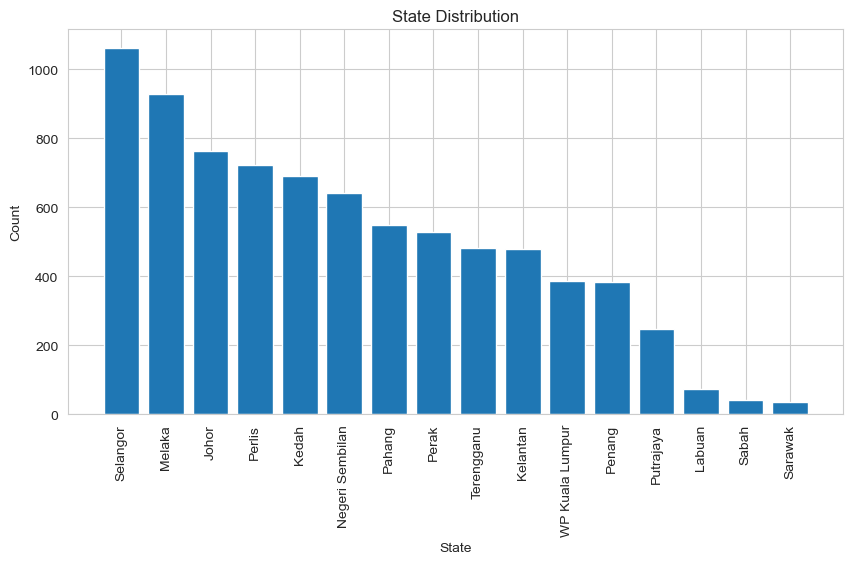

In [18]:
# Visualize the distribution of the 'State' column in the OrderReport dataset

x = df2['State'].value_counts().index
y = df2['State'].value_counts().values

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title('State Distribution')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


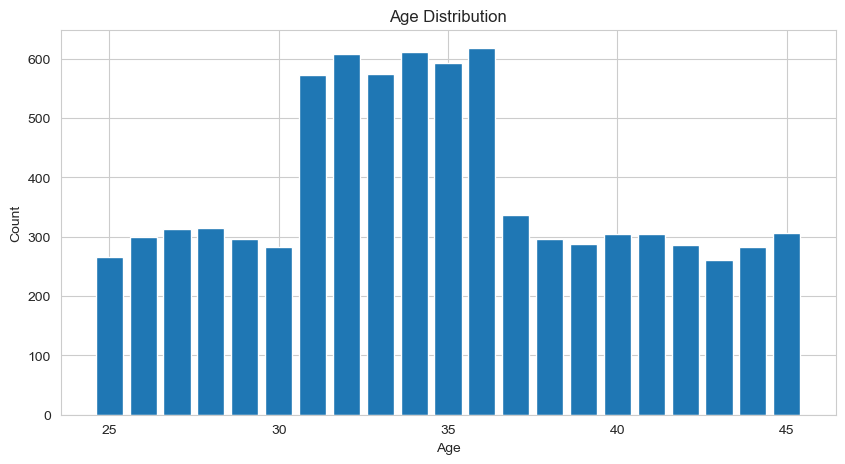

In [19]:
# Visualize the distribution of the 'Age' column in the OrderReport dataset using a scatter line plot

x = df2['Age'].value_counts().index
y = df2['Age'].value_counts().values

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
